<a href="https://colab.research.google.com/github/JMCastle98/M4_Analisis_de_Datos_con_Python/blob/main/Postwork07/Postwork07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Postwork 7: Procesamiento de lenguaje natural

En esta sección aplicamos procesamiento de lenguaje natural al proyecto, únicamente para poner en práctica lo visto en el módulo ya que realmente no es fundamental para nuestro analisis.

In [ ]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_clean = pd.read_csv("https://raw.githubusercontent.com/JMCastle98/M4_Analisis_de_Datos_con_Python/main/Dataset/pok%C3%A9dex_clean.csv", index_col=0)

Después de realizar los import es necesario realizar imports y descargas necesarias por parte de la libreria nltk para poder realizar el procesamiento.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Realizamos una agrupaciones ya que se repiten mucho las especies por los pokémon de una misma línea evolutiva y son la única columna en la que podemos aplicar el procesamiento de lenguaje ya que si utilizamos la columna de nombres estos no se repiten realmente.

In [ ]:
df_groupedAB = df_clean.groupby('species')[['species']].max()

df_groupedAB.head()

,species
species,
Abundance Pokémon,Abundance Pokémon
Acorn Pokémon,Acorn Pokémon
Alloy Pokémon,Alloy Pokémon
Alpha Pokémon,Alpha Pokémon
Angler Pokémon,Angler Pokémon


Para poder aplicar el procesamiento es necesario convertir primero todos los elementos a procesar a string ya que nltk en este caso asi lo requiere.

In [ ]:
df_groupedAB['species']=df_groupedAB['species'].apply(str)

In [ ]:
df_groupedAB = df_groupedAB["species"]

In [ ]:
df_groupedAB = df_groupedAB.astype(str)

In [ ]:
df_groupedAB.head()

species
Abundance Pokémon    Abundance Pokémon
Acorn Pokémon            Acorn Pokémon
Alloy Pokémon            Alloy Pokémon
Alpha Pokémon            Alpha Pokémon
Angler Pokémon          Angler Pokémon
Name: species, dtype: object

In [ ]:
df_groupedAB[df_groupedAB.str.contains('horse', case=False)]

species
Draft Horse Pokémon    Draft Horse Pokémon
Fire Horse Pokémon      Fire Horse Pokémon
Swift Horse Pokémon    Swift Horse Pokémon
Wild Horse Pokémon      Wild Horse Pokémon
Name: species, dtype: object

A continuación generamos una lista con todas las palabras contenidas en nuestro nuevo dataframe para poder procesarlas.

In [ ]:
tokenized = df_groupedAB.apply(nltk.word_tokenize)

In [ ]:
tokenized

species
Abundance Pokémon       [Abundance, Pokémon]
Acorn Pokémon               [Acorn, Pokémon]
Alloy Pokémon               [Alloy, Pokémon]
Alpha Pokémon               [Alpha, Pokémon]
Angler Pokémon             [Angler, Pokémon]
                               ...          
Worm Pokémon                 [Worm, Pokémon]
Wrestling Pokémon       [Wrestling, Pokémon]
Wushu Pokémon               [Wushu, Pokémon]
Young Fowl Pokémon    [Young, Fowl, Pokémon]
Zen Charm Pokémon      [Zen, Charm, Pokémon]
Name: species, Length: 652, dtype: object

In [ ]:
all_words = tokenized.sum()
text = nltk.Text(all_words)

text

<Text: Abundance Pokémon Acorn Pokémon Alloy Pokémon Alpha Pokémon...>

En la siguiente linea realizamos una prueba para encontrar palabras en nuestra serie creada, elegimos "horse" ya que fue una palabra que encontramos aparece más de una vez en nuestra serie además de la palabra "Pokemon":

In [ ]:
text.concordance('horse', lines=20)

Displaying 4 of 4 matches:
n Donkey Pokémon Dopey Pokémon Draft Horse Pokémon Dragon Orb Pokémon Dragon Po
eeling Pokémon Fire Cat Pokémon Fire Horse Pokémon Fire Mouse Pokémon Fire Pig 
rpower Pokémon Swallow Pokémon Swift Horse Pokémon Swine Pokémon Swollen Pokémo
 Bull Pokémon Wild Duck Pokémon Wild Horse Pokémon Wild Monkey Pokémon Wild Pig


In [ ]:
# Total de palabras 
len(text)

1525

In [ ]:
# Total de palabras distintas
len(set(text))

657

In [ ]:
# Cuantificando la riqueza léxica
len(set(text)) / len(text)

0.4308196721311475

In [ ]:
# Las colocaciones son pares de palabras (bigramas) que son inusualmente comunes en nuestro conjunto de datos
text.collocations()

Fire Pig; Bird Pokémon; Pokémon Iron; Pokémon Tiny; Pokémon Water;
Snake Pokémon; Pokémon Big; Monkey Pokémon; Mouse Pokémon; Pokémon
Long; Pokémon Poison; Pokémon Wild; Pokémon Sea; Fish Pokémon; Horse
Pokémon; Pokémon Cotton; Pokémon Thorn; Pokémon Rock; Crab Pokémon;
Fox Pokémon


In [ ]:
# FreqDist para analizar la distribución de frecuencia de nuestras palabras

freq_dist = nltk.FreqDist(all_words)

print(freq_dist)

<FreqDist with 657 samples and 1525 outcomes>


In [ ]:
freq_dist.most_common(50)

[('Pokémon', 652),
 ('Sea', 12),
 ('Bird', 9),
 ('Iron', 8),
 ('Tiny', 8),
 ('Rock', 7),
 ('Snake', 7),
 ('Water', 7),
 ('Big', 6),
 ('Mouse', 5),
 ('Ball', 5),
 ('Cat', 5),
 ('Fire', 5),
 ('Monkey', 5),
 ('Long', 5),
 ('Poison', 5),
 ('Wild', 5),
 ('Armor', 4),
 ('Blade', 4),
 ('Star', 4),
 ('Cotton', 4),
 ('Horse', 4),
 ('Sword', 4),
 ('Pig', 4),
 ('Fish', 4),
 ('Snow', 4),
 ('Grass', 4),
 ('Land', 4),
 ('Thorn', 4),
 ('Apple', 3),
 ('Wing', 3),
 ('Quill', 3),
 ('Bee', 3),
 ('Horn', 3),
 ('Turtle', 3),
 ('Bloom', 3),
 ('Bubble', 3),
 ('Fox', 3),
 ('Moth', 3),
 ('Crab', 3),
 ('High', 3),
 ('Lizard', 3),
 ('Royal', 3),
 ('Sand', 3),
 ('Ant', 2),
 ('Aqua', 2),
 ('Rabbit', 2),
 ('Arm', 2),
 ('Body', 2),
 ('Jaw', 2)]

In [ ]:
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')

all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

En la siguiente gráfica se muestra el total acumulado de las palabras más repetidas de nuestra serie.

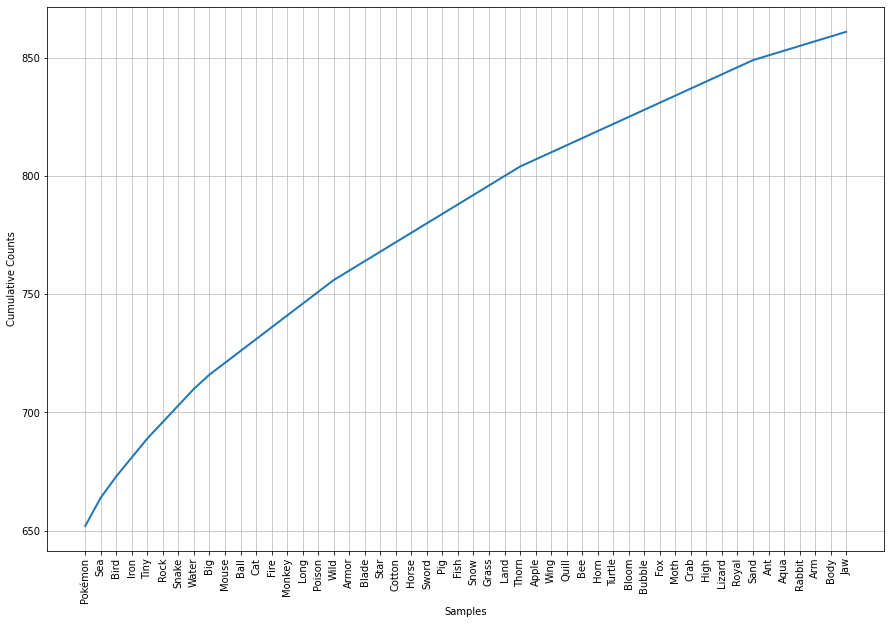

In [ ]:
plt.figure(figsize=(15,10))
freq_dist_no_stop_words.plot(50, cumulative=True);

In [ ]:
# Palabras que sólo aparecen una sola vez

freq_dist_no_stop_words.hapaxes()[:20]

['Abundance',
 'Acorn',
 'Alloy',
 'Alpha',
 'Angler',
 'Pit',
 'Anteater',
 'Antenna',
 'Core',
 'Nectar',
 'Thrust',
 'Arrow',
 'Artificial',
 'Astral',
 'Atrocious',
 'Attaching',
 'Aura',
 'Aurora',
 'Automaton',
 'Avianoid']

In [ ]:
# frecuencia de longitudes de palabras

freq_dist_lengths = nltk.FreqDist([len(w) for w in all_words_except_stop_words])

In [ ]:
freq_dist_lengths.most_common()

[(7, 738),
 (4, 229),
 (5, 183),
 (6, 134),
 (3, 89),
 (8, 55),
 (9, 54),
 (10, 21),
 (11, 15),
 (12, 5),
 (2, 1),
 (13, 1)]

In [ ]:
freq_dist = nltk.FreqDist(all_words_except_stop_words)

In [ ]:
freq_dist.most_common(20)

[('Pokémon', 652),
 ('Sea', 12),
 ('Bird', 9),
 ('Iron', 8),
 ('Tiny', 8),
 ('Rock', 7),
 ('Snake', 7),
 ('Water', 7),
 ('Big', 6),
 ('Mouse', 5),
 ('Ball', 5),
 ('Cat', 5),
 ('Fire', 5),
 ('Monkey', 5),
 ('Long', 5),
 ('Poison', 5),
 ('Wild', 5),
 ('Armor', 4),
 ('Blade', 4),
 ('Star', 4)]

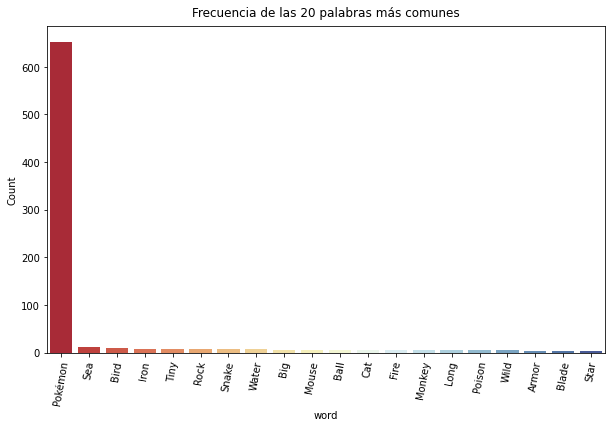

In [ ]:
#frecuencia de las palabras más comunes

most_common_201 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))
most_common_20 = pd.DataFrame(most_common_201, columns= ['word', 'frequency'])
most_common_20['frequency'] = most_common_20['frequency'].apply(int)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x = most_common_20['word'] , y = most_common_20['frequency'], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

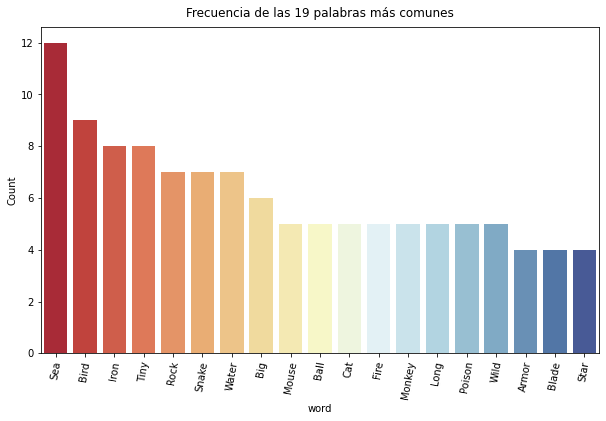

In [ ]:
#frecuencia de las palabras más comunes ignorado pokemon

most_common_201 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))
most_common_20 = pd.DataFrame(most_common_201, columns= ['word', 'frequency'])
most_common_20['frequency'] = most_common_20['frequency'].apply(int)

most_common_20['word'] = most_common_20[ most_common_20['word'] != 'Pokémon' ]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x = most_common_20['word'] , y = most_common_20['frequency'], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 19 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [ ]:
# También podemos visualizar la frecuencia de los bigramas más comunes

text = nltk.Text(all_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


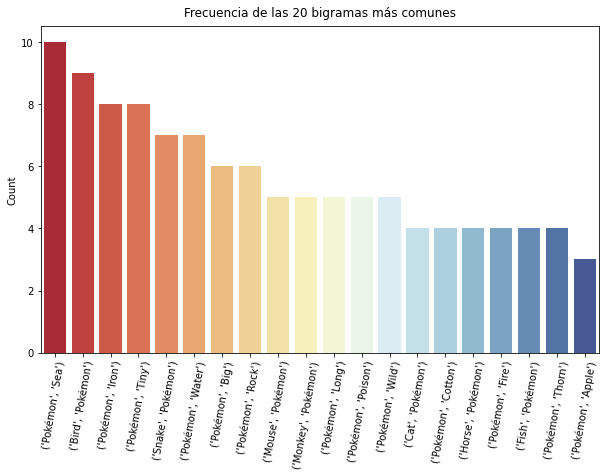

In [ ]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot( x = most_common_20[:, 0], y = most_common_20[:, 1], ax=ax, palette='RdYlBu')
ax.set_title('Frecuencia de las 20 bigramas más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [ ]:
from wordcloud import WordCloud

Finalmente generamos un WordCloud con las palabras, con mayor tamaño aquellas con mayor frecuencia.

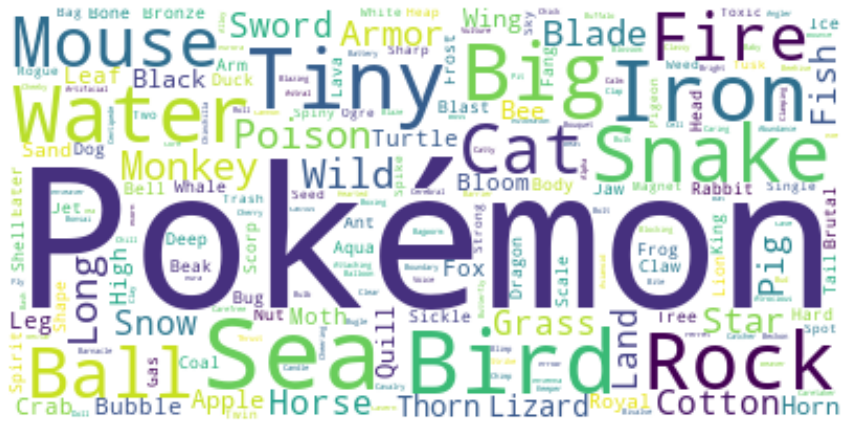

In [ ]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Como era de esperarse, la palabra pokémon es la que más aparecerá debido a que las especies generalmente tienen esta palabra en ella, de análisis anteriores sabemos que los pokémon de tipo agua, volador y normal son bastante comúnes por lo que encontrmos palabras relacionada como "Sea" y "Bird", también encontramos palabras relacionadas a especies del mundo real como "Monkey" y "Snake" indicativos del animal en el que están basados. Finalmente, otro par de palabras que llaman la atención y son bastante comúnes son las que indican el tamaño del pokémon como "Tiny" y "Big".

<p align="center">
<img src="https://th.bing.com/th/id/Rc039cf34c7a1ccff901041e83a6e8edd?rik=uhkYgnSHjTZ0PA&riu=http%3a%2f%2ffotos.e-consulta.com%2fpikachu_sorprendido.jpg&ehk=SjZ%2b1htcRQpfLubhPankLHzIlWZa3%2fIhoCBi99elCUU%3d&risl=&pid=ImgRaw"  height ="250" width = "400">
</p>